In [1]:
import re
import nltk
import spacy
import codecs
import requests

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from textblob import TextBlob
from bs4 import BeautifulSoup
from tqdm import tqdm_notebook
from wordcloud import WordCloud
from nltk.corpus import stopwords
from bs4 import BeautifulSoup as bs
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

In [2]:
headers = {'authority': 'www.amazon.in',
           'accept-language': 'en-US,en;q=0.9',
           'referer': 'https://www.amazon.in/boAt-Xtend-Pro-Dedicated-Bluetooth/dp/B0B574QXFL/ref=sr_1_3?adgrpid=66314740727&ext_vrnc=hi&gclid=CjwKCAiAheacBhB8EiwAItVO27OqojMgIrqr8l4RkhJXVEgEYEy5H4Hv_ggVfrdU-8RF6WYv_aDItRoCKvwQAvD_BwE&hvadid=398059830400&hvdev=c&hvlocphy=1007768&hvnetw=g&hvqmt=b&hvrand=1335892987492695214&hvtargid=kwd-1434352673191&hydadcr=24569_1971431&keywords=boat+xtend+pro&qid=1671035479&sr=8-3',
           'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36'}

In [3]:
def get_soup(url):
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [4]:
reviewlist = []

def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
                      'Rating':float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
                      'Review':item.find('span', {'data-hook': 'review-body'}).text.strip(),
                      'Review_Date':item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India 🇮🇳 on', 'Reviewed in India on').strip()}
            reviewlist.append(review)
    except:
        pass

In [5]:
for x in tqdm_notebook(range(160)):
    soup = get_soup(f'https://www.amazon.in/boAt-Xtend-Pro-Dedicated-Bluetooth/product-reviews/B0B574QXFL/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    get_reviews(soup)
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

  0%|          | 0/160 [00:00<?, ?it/s]

In [6]:
df = pd.DataFrame(reviewlist)
df

Title  Rating  \
0                 5.0 out of 5 stars\nVery nice prdt 👍     5.0   
1                    4.0 out of 5 stars\nGood product.     4.0   
2                                5.0 out of 5 stars\n.     5.0   
3    5.0 out of 5 stars\nNothing bs charging ka dhy...     5.0   
4    4.0 out of 5 stars\nGood watch for all but req...     4.0   
..                                                 ...     ...   
105  5.0 out of 5 stars\nWorth for money and cheap ...     5.0   
106                           5.0 out of 5 stars\nGOOD     5.0   
107                        5.0 out of 5 stars\nDurable     5.0   
108                          5.0 out of 5 stars\nhardi     5.0   
109           3.0 out of 5 stars\nNot worth the price.     3.0   

                                                Review  \
0    Watch looks very elegant. I love wearing this ...   
1    This smart (model Boat extend plus) watch is f...   
2    It has a great quality and the built features ...   
3                  Nice watch but games nahi hain isme   
4    My experience with the boAt Xtend Call Plus Sm...   
..                                                 ...   
105  I bought it for my friend. He is in Dubai. He ...   
106                                           GOOD ONE   
107                                       Nice watch 👌   
108                                               nice   
109  It lacks the very basic feature of ringing ton...   

                              Review_Date  
0    Reviewed in India on 17 January 2024  
1     Reviewed in India on 27 August 2023  
2    Reviewed in India on 22 January 2024  
3    Reviewed in India on 7 February 2024  
4        Reviewed in India on 30 May 2023  
..                                    ...  
105   Reviewed in India on 6 January 2024  
106  Reviewed in India on 31 January 2024  
107  Reviewed in India on 30 January 2024  
108  Reviewed in India on 25 January 2024  
109  Reviewed in India on 7 December 2023  

[110 rows x 4 columns]

In [7]:
df["Review_Date"] = df["Review_Date"].replace('Reviewed in India on','', regex=True)

In [8]:
df.head(50)

Title  Rating  \
0                5.0 out of 5 stars\nVery nice prdt 👍     5.0   
1                   4.0 out of 5 stars\nGood product.     4.0   
2                               5.0 out of 5 stars\n.     5.0   
3   5.0 out of 5 stars\nNothing bs charging ka dhy...     5.0   
4   4.0 out of 5 stars\nGood watch for all but req...     4.0   
5   3.0 out of 5 stars\nGood build quality & displ...     3.0   
6               5.0 out of 5 stars\nBest Budget watch     5.0   
7               4.0 out of 5 stars\nBettary life good     4.0   
8             3.0 out of 5 stars\nNOt worth the money     3.0   
9                4.0 out of 5 stars\nGood smart watch     4.0   
10               5.0 out of 5 stars\nVery nice prdt 👍     5.0   
11                  4.0 out of 5 stars\nGood product.     4.0   
12                              5.0 out of 5 stars\n.     5.0   
13  5.0 out of 5 stars\nNothing bs charging ka dhy...     5.0   
14  4.0 out of 5 stars\nGood watch for all but req...     4.0   
15  3.0 out of 5 stars\nGood build quality & displ...     3.0   
16              5.0 out of 5 stars\nBest Budget watch     5.0   
17              4.0 out of 5 stars\nBettary life good     4.0   
18            3.0 out of 5 stars\nNOt worth the money     3.0   
19               4.0 out of 5 stars\nGood smart watch     4.0   
20  4.0 out of 5 stars\nGood budget smart watch wi...     4.0   
21  4.0 out of 5 stars\nEverything is very good ex...     4.0   
22  4.0 out of 5 stars\nGood watch wake gaster is ...     4.0   
23                      4.0 out of 5 stars\nQualified     4.0   
24                      4.0 out of 5 stars\nGud watch     4.0   
25              4.0 out of 5 stars\nLove the colour .     4.0   
26        4.0 out of 5 stars\nGood or bad for product     4.0   
27                      4.0 out of 5 stars\nGood work     4.0   
28         4.0 out of 5 stars\nOverall A Good Product     4.0   
29                4.0 out of 5 stars\nWorth the penny     4.0   
30            4.0 out of 5 stars\nGood budget product     4.0   
31     4.0 out of 5 stars\nGood product at this price     4.0   
32                           4.0 out of 5 stars\nBest     4.0   
33                      4.0 out of 5 stars\nVery Nice     4.0   
34                  4.0 out of 5 stars\nPerfect watch     4.0   
35                         4.0 out of 5 stars\nColour     4.0   
36                    4.0 out of 5 stars\nNyc product     4.0   
37              4.0 out of 5 stars\nWork nhi kr rhi h     4.0   
38                 4.0 out of 5 stars\nVery classy ☺️     4.0   
39                           4.0 out of 5 stars\nGood     4.0   
40                        4.0 out of 5 stars\nQuality     4.0   
41                      4.0 out of 5 stars\nVery good     4.0   
42                   4.0 out of 5 stars\nProduct good     4.0   
43                           4.0 out of 5 stars\nGood     4.0   
44                      4.0 out of 5 stars\nVery good     4.0   
45                    4.0 out of 5 stars\nGood enough     4.0   
46                           4.0 out of 5 stars\nGood     4.0   
47                3.0 out of 5 stars\nProduct review.     3.0   
48  3.0 out of 5 stars\nGood watch but bit tricky ...     3.0   
49      4.0 out of 5 stars\nSailing in the same boat…     4.0   

                                               Review        Review_Date  
0   Watch looks very elegant. I love wearing this ...    17 January 2024  
1   This smart (model Boat extend plus) watch is f...     27 August 2023  
2   It has a great quality and the built features ...    22 January 2024  
3                 Nice watch but games nahi hain isme    7 February 2024  
4   My experience with the boAt Xtend Call Plus Sm...        30 May 2023  
5   Skipping the parts mostly covered in other rev...      9 August 2022  
6   The media could not be loaded.\n              ...     12 August 2021  
7   Face pic not allowed in face watch and working...    5 February 2024  
8   Review OverviewAverage2.7The Boat today launch...    

In [10]:
df.to_csv("BoatSmartWatch_Review.csv")

In [11]:
reviews = pd.read_csv('BoatSmartWatch_Review.csv')
reviews.drop(['Unnamed: 0'],inplace=True,axis=1)
reviews

Title  Rating  \
0                 5.0 out of 5 stars\nVery nice prdt 👍     5.0   
1                    4.0 out of 5 stars\nGood product.     4.0   
2                                5.0 out of 5 stars\n.     5.0   
3    5.0 out of 5 stars\nNothing bs charging ka dhy...     5.0   
4    4.0 out of 5 stars\nGood watch for all but req...     4.0   
..                                                 ...     ...   
105  5.0 out of 5 stars\nWorth for money and cheap ...     5.0   
106                           5.0 out of 5 stars\nGOOD     5.0   
107                        5.0 out of 5 stars\nDurable     5.0   
108                          5.0 out of 5 stars\nhardi     5.0   
109           3.0 out of 5 stars\nNot worth the price.     3.0   

                                                Review       Review_Date  
0    Watch looks very elegant. I love wearing this ...   17 January 2024  
1    This smart (model Boat extend plus) watch is f...    27 August 2023  
2    It has a great quality and the built features ...   22 January 2024  
3                  Nice watch but games nahi hain isme   7 February 2024  
4    My experience with the boAt Xtend Call Plus Sm...       30 May 2023  
..                                                 ...               ...  
105  I bought it for my friend. He is in Dubai. He ...    6 January 2024  
106                                           GOOD ONE   31 January 2024  
107                                       Nice watch 👌   30 January 2024  
108                                               nice   25 January 2024  
109  It lacks the very basic feature of ringing ton...   7 December 2023  

[110 rows x 4 columns]

In [12]:
reviews.Rating.describe()

count    110.000000
mean       4.154545
std        0.623491
min        3.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: Rating, dtype: float64

In [13]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        110 non-null    object 
 1   Rating       110 non-null    float64
 2   Review       108 non-null    object 
 3   Review_Date  110 non-null    object 
dtypes: float64(1), object(3)
memory usage: 3.6+ KB


In [14]:
reviews.isna().sum()

Title          0
Rating         0
Review         2
Review_Date    0
dtype: int64

In [15]:
reviews.dropna(subset=['Review'],inplace=True)
reviews.head()

Title  Rating  \
0               5.0 out of 5 stars\nVery nice prdt 👍     5.0   
1                  4.0 out of 5 stars\nGood product.     4.0   
2                              5.0 out of 5 stars\n.     5.0   
3  5.0 out of 5 stars\nNothing bs charging ka dhy...     5.0   
4  4.0 out of 5 stars\nGood watch for all but req...     4.0   

                                              Review       Review_Date  
0  Watch looks very elegant. I love wearing this ...   17 January 2024  
1  This smart (model Boat extend plus) watch is f...    27 August 2023  
2  It has a great quality and the built features ...   22 January 2024  
3                Nice watch but games nahi hain isme   7 February 2024  
4  My experience with the boAt Xtend Call Plus Sm...       30 May 2023

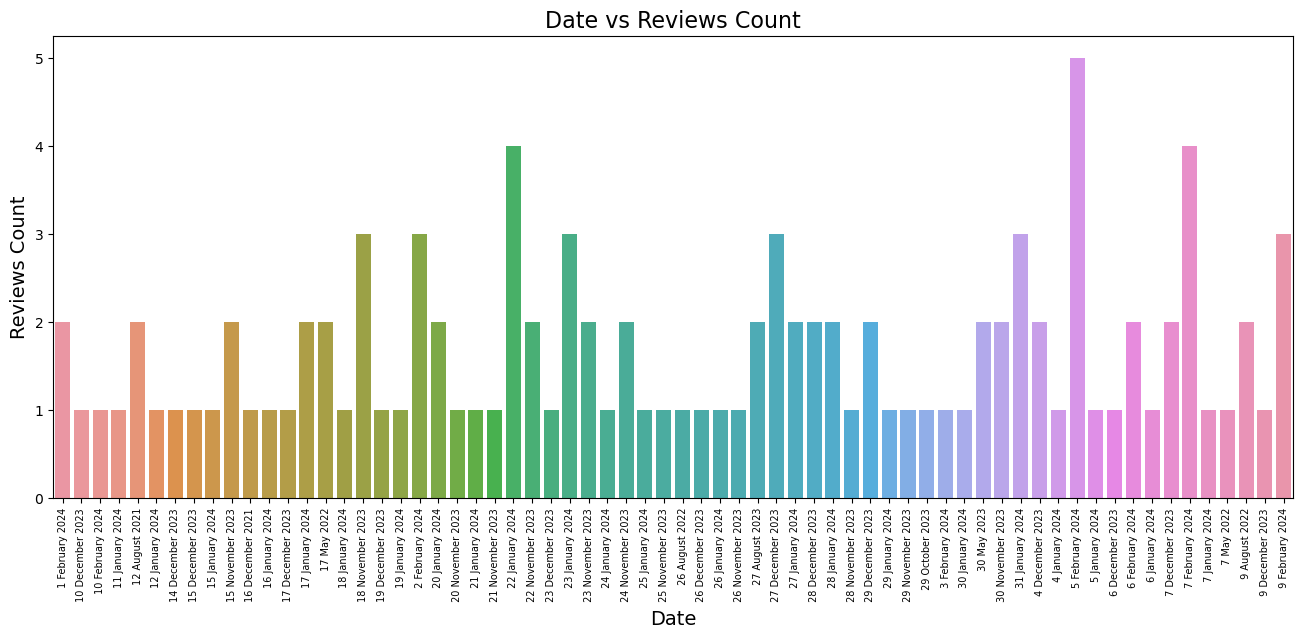

In [16]:
#Creating a dataframe
dayreview = pd.DataFrame(reviews.groupby('Review_Date')['Review'].count()).reset_index()
dayreview['Date'] = dayreview['Review_Date']
dayreview.sort_values(by = ['Review_Date'])

#Plotting the graph
plt.figure(figsize=(16,6))
sns.barplot(x = "Date", y = "Review", data = dayreview)
plt.title('Date vs Reviews Count', fontsize=16)
plt.xticks(rotation=90,fontsize=7)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Reviews Count',fontsize=14)
plt.show()

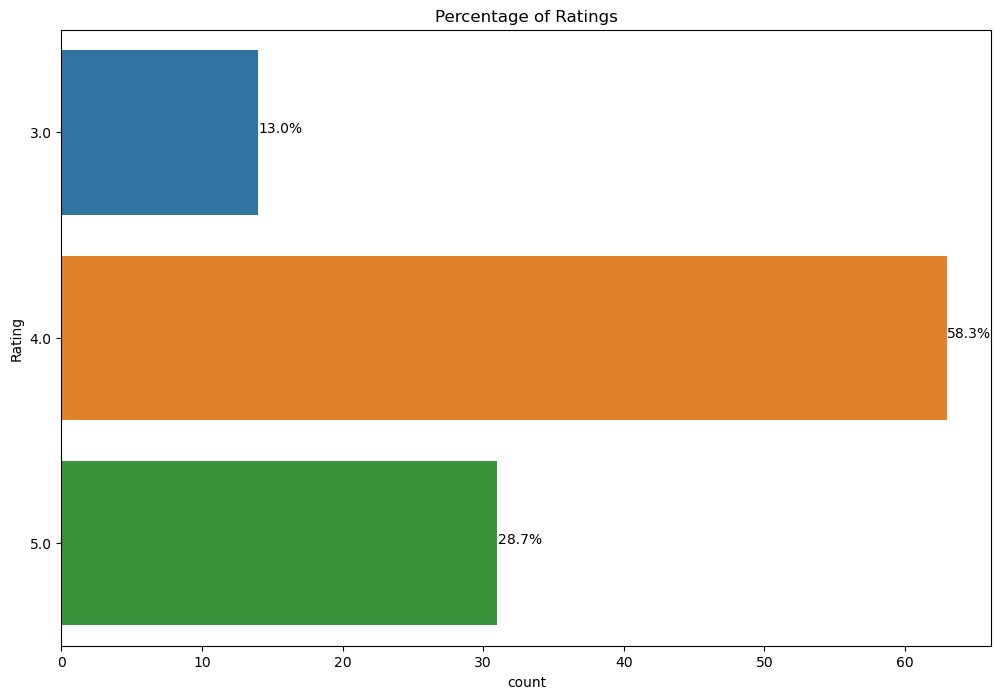

In [17]:
plt.figure(figsize=(12,8))
plt.title('Percentage of Ratings')
ax = sns.countplot(y = 'Rating', data = reviews)
total = len(reviews)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

In [18]:
reviews['Review'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    Watch looks very elegant. I love wearing this ...
1    His smart (model Coat extend plus) watch is sa...
2    It has a great quality and the built features ...
3                  Vice watch but games nasi pain isle
4    By experience with the boot Tend All Plus Smar...
Name: Review, dtype: object

In [19]:
boat_review = reviews[['Review']]
boat_review

Review
0    Watch looks very elegant. I love wearing this ...
1    This smart (model Boat extend plus) watch is f...
2    It has a great quality and the built features ...
3                  Nice watch but games nahi hain isme
4    My experience with the boAt Xtend Call Plus Sm...
..                                                 ...
105  I bought it for my friend. He is in Dubai. He ...
106                                           GOOD ONE
107                                       Nice watch 👌
108                                               nice
109  It lacks the very basic feature of ringing ton...

[108 rows x 1 columns]

In [20]:
boat_review.reset_index(drop=True, inplace=True)

In [21]:
stop_words = stopwords.words('english')
boat_review['Review'] = boat_review['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split() if x not in stop_words))

In [22]:
lemmatizer = WordNetLemmatizer()
# Removing punctuation, making str to lower, applying Lemmatizer, Removing Stop words
corpus=[]
for i in tqdm_notebook(range(0, len(boat_review))):
    cleaned = re.sub('[^a-zA-Z]', " ", boat_review["Review"][i])
    cleaned = cleaned.lower()
    cleaned = cleaned.split()
    cleaned = [lemmatizer.lemmatize(word) for word in cleaned if word not in stopwords.words("english")]
    cleaned = ' '.join(cleaned)
    corpus.append(cleaned)

  0%|          | 0/108 [00:00<?, ?it/s]

In [23]:
#Saving cleaned data to compare with original data, to ckeck amount of information lost
dataframe = pd.DataFrame({"Clean_Reviews": corpus,"Uncleaned_Reviews": boat_review.Review})
dataframe.head()

Clean_Reviews  \
0  watch look elegant love wearing watch performa...   
1  smart model boat extend plus watch functioning...   
2  great quality built feature good also waterpro...   
3                     nice watch game nahi hain isme   
4  experience boat xtend call plus smart watch so...   

                                   Uncleaned_Reviews  
0  watch looks elegant. i love wearing watch. per...  
1  this smart (model boat extend plus) watch func...  
2  it great quality built features good also wate...  
3                    nice watch games nahi hain isme  
4  my experience boat xtend call plus smart watch...

In [24]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    
    return text 

In [25]:
# We are keeping cleaned tweets in a new column called 'tidy_tweets'
dataframe['Clean_Reviews'] = np.vectorize(remove_pattern)(dataframe['Clean_Reviews'], "@[\w]*")
dataframe.head(10)

Clean_Reviews  \
0  watch look elegant love wearing watch performa...   
1  smart model boat extend plus watch functioning...   
2  great quality built feature good also waterpro...   
3                     nice watch game nahi hain isme   
4  experience boat xtend call plus smart watch so...   
5  skipping part mostly covered review sponsored ...   
6  medium could loaded used watch month bought fi...   
7  face pic allowed face watch working best activ...   
8  review overviewaverage boat today launched boa...   
9  smart watch good value money feature packed pr...   

                                   Uncleaned_Reviews  
0  watch looks elegant. i love wearing watch. per...  
1  this smart (model boat extend plus) watch func...  
2  it great quality built features good also wate...  
3                    nice watch games nahi hain isme  
4  my experience boat xtend call plus smart watch...  
5  skipping parts mostly covered reviews sponsore...  
6  the media could loaded. used watch month now.....  
7  face pic allowed face watch working best activ...  
8  review overviewaverage2.7the boat today launch...  
9  this smart watch good value money 💰. and featu...

In [26]:
cleaned_reviews = []

for index, row in dataframe.iterrows():
    words_without_links = [word for word in row.Clean_Reviews.split() if 'http' not in word]
    cleaned_reviews.append(' '.join(words_without_links))

dataframe['Clean_Reviews'] = cleaned_reviews
dataframe.head(10)

Clean_Reviews  \
0  watch look elegant love wearing watch performa...   
1  smart model boat extend plus watch functioning...   
2  great quality built feature good also waterpro...   
3                     nice watch game nahi hain isme   
4  experience boat xtend call plus smart watch so...   
5  skipping part mostly covered review sponsored ...   
6  medium could loaded used watch month bought fi...   
7  face pic allowed face watch working best activ...   
8  review overviewaverage boat today launched boa...   
9  smart watch good value money feature packed pr...   

                                   Uncleaned_Reviews  
0  watch looks elegant. i love wearing watch. per...  
1  this smart (model boat extend plus) watch func...  
2  it great quality built features good also wate...  
3                    nice watch games nahi hain isme  
4  my experience boat xtend call plus smart watch...  
5  skipping parts mostly covered reviews sponsore...  
6  the media could loaded. used watch month now.....  
7  face pic allowed face watch working best activ...  
8  review overviewaverage2.7the boat today launch...  
9  this smart watch good value money 💰. and featu...

In [27]:
dataframe = dataframe[dataframe['Clean_Reviews']!='']
dataframe.head(10)

Clean_Reviews  \
0  watch look elegant love wearing watch performa...   
1  smart model boat extend plus watch functioning...   
2  great quality built feature good also waterpro...   
3                     nice watch game nahi hain isme   
4  experience boat xtend call plus smart watch so...   
5  skipping part mostly covered review sponsored ...   
6  medium could loaded used watch month bought fi...   
7  face pic allowed face watch working best activ...   
8  review overviewaverage boat today launched boa...   
9  smart watch good value money feature packed pr...   

                                   Uncleaned_Reviews  
0  watch looks elegant. i love wearing watch. per...  
1  this smart (model boat extend plus) watch func...  
2  it great quality built features good also wate...  
3                    nice watch games nahi hain isme  
4  my experience boat xtend call plus smart watch...  
5  skipping parts mostly covered reviews sponsore...  
6  the media could loaded. used watch month now.....  
7  face pic allowed face watch working best activ...  
8  review overviewaverage2.7the boat today launch...  
9  this smart watch good value money 💰. and featu...

In [28]:
dataframe.drop_duplicates(subset=['Clean_Reviews'], keep=False)
dataframe.head(10)

Clean_Reviews  \
0  watch look elegant love wearing watch performa...   
1  smart model boat extend plus watch functioning...   
2  great quality built feature good also waterpro...   
3                     nice watch game nahi hain isme   
4  experience boat xtend call plus smart watch so...   
5  skipping part mostly covered review sponsored ...   
6  medium could loaded used watch month bought fi...   
7  face pic allowed face watch working best activ...   
8  review overviewaverage boat today launched boa...   
9  smart watch good value money feature packed pr...   

                                   Uncleaned_Reviews  
0  watch looks elegant. i love wearing watch. per...  
1  this smart (model boat extend plus) watch func...  
2  it great quality built features good also wate...  
3                    nice watch games nahi hain isme  
4  my experience boat xtend call plus smart watch...  
5  skipping parts mostly covered reviews sponsore...  
6  the media could loaded. used watch month now.....  
7  face pic allowed face watch working best activ...  
8  review overviewaverage2.7the boat today launch...  
9  this smart watch good value money 💰. and featu...

In [29]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [30]:
dataframe['Clean_Reviews']=dataframe['Clean_Reviews'].apply(lambda x: remove_emoji(x))
dataframe.head(10)

Clean_Reviews  \
0  watch look elegant love wearing watch performa...   
1  smart model boat extend plus watch functioning...   
2  great quality built feature good also waterpro...   
3                     nice watch game nahi hain isme   
4  experience boat xtend call plus smart watch so...   
5  skipping part mostly covered review sponsored ...   
6  medium could loaded used watch month bought fi...   
7  face pic allowed face watch working best activ...   
8  review overviewaverage boat today launched boa...   
9  smart watch good value money feature packed pr...   

                                   Uncleaned_Reviews  
0  watch looks elegant. i love wearing watch. per...  
1  this smart (model boat extend plus) watch func...  
2  it great quality built features good also wate...  
3                    nice watch games nahi hain isme  
4  my experience boat xtend call plus smart watch...  
5  skipping parts mostly covered reviews sponsore...  
6  the media could loaded. used watch month now.....  
7  face pic allowed face watch working best activ...  
8  review overviewaverage2.7the boat today launch...  
9  this smart watch good value money 💰. and featu...

In [33]:
with codecs.open("stop.txt", "r", encoding="ISO-8859-1") as s:
    stop = s.read()
    print(stop[:101])

a
a's
able
about
above
according
accordingly
across
actually
after
afterwards
again
again


In [34]:
stop.split(" ")

["a\r\na's\r\nable\r\nabout\r\nabove\r\naccording\r\naccordingly\r\nacross\r\nactually\r\nafter\r\nafterwards\r\nagain\r\nagainst\r\nain't\r\nall\r\nallow\r\nallows\r\nalmost\r\nalone\r\nalong\r\nalready\r\nalso\r\nalthough\r\nalways\r\nam\r\namong\r\namongst\r\nan\r\nand\r\nanother\r\nany\r\nanybody\r\nanyhow\r\nanyone\r\nanything\r\nanyway\r\nanyways\r\nanywhere\r\napart\r\nappear\r\nappreciate\r\nappropriate\r\nare\r\naren't\r\naround\r\nas\r\naside\r\nask\r\nasking\r\nassociated\r\nat\r\navailable\r\naway\r\nawfully\r\nb\r\nbe\r\nbecame\r\nbecause\r\nbecome\r\nbecomes\r\nbecoming\r\nbeen\r\nbefore\r\nbeforehand\r\nbehind\r\nbeing\r\nbelieve\r\nbelow\r\nbeside\r\nbesides\r\nbest\r\nbetter\r\nbetween\r\nbeyond\r\nboth\r\nbrief\r\nbut\r\nby\r\nc\r\nc'mon\r\nc's\r\ncame\r\ncan\r\ncan't\r\ncannot\r\ncant\r\ncause\r\ncauses\r\ncertain\r\ncertainly\r\nchanges\r\nclearly\r\nco\r\ncom\r\ncome\r\ncomes\r\nconcerning\r\nconsequently\r\nconsider\r\nconsidering\r\ncontain\r\ncontaining\r\nconta

In [35]:
my_stop_words = stopwords.words('english')
sw_list = [stop]
my_stop_words.extend(sw_list)
stopwords_set = set(my_stop_words)
cleaned_tweets = []

for index, row in dataframe.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords = [word for word in row.Clean_Reviews.split() if not word in stopwords_set and '#' not in word.lower()]
    
    # finally creating tweets list of tuples containing stopwords(list) and sentimentType 
    cleaned_tweets.append(' '.join(words_without_stopwords))
    
dataframe['Clean_Reviews'] = cleaned_tweets
dataframe.head(10)

Clean_Reviews  \
0  watch look elegant love wearing watch performa...   
1  smart model boat extend plus watch functioning...   
2  great quality built feature good also waterpro...   
3                     nice watch game nahi hain isme   
4  experience boat xtend call plus smart watch so...   
5  skipping part mostly covered review sponsored ...   
6  medium could loaded used watch month bought fi...   
7  face pic allowed face watch working best activ...   
8  review overviewaverage boat today launched boa...   
9  smart watch good value money feature packed pr...   

                                   Uncleaned_Reviews  
0  watch looks elegant. i love wearing watch. per...  
1  this smart (model boat extend plus) watch func...  
2  it great quality built features good also wate...  
3                    nice watch games nahi hain isme  
4  my experience boat xtend call plus smart watch...  
5  skipping parts mostly covered reviews sponsore...  
6  the media could loaded. used watch month now.....  
7  face pic allowed face watch working best activ...  
8  review overviewaverage2.7the boat today launch...  
9  this smart watch good value money 💰. and featu...

In [36]:
TextBlob(dataframe['Clean_Reviews'][1]).words

WordList(['smart', 'model', 'boat', 'extend', 'plus', 'watch', 'functioning', 'well', 'worth', 'price', 'r', 'battery', 'beginning', 'lasted', 'day', 'next', 'charge', 'lasted', 'day', 'last', 'settled', 'one', 'day', 'extensive', 'user', 'apps', 'amoled', 'display', 'good', 'touch', 'feature', 'good', 'access', 'apps', 'easily', 'reachable', 'simple', 'browsing', 'feature', 'sleep', 'measurement', 'good', 'taking', 'day', 'time', 'nap', 'night', 'time', 'showing', 'exactly', 'went', 'sleep', 'woke', 'spo', 'measurement', 'neaarer', 'measurement', 'personal', 'digital', 'instrument', 'heart', 'rate', 'measurement', 'also', 'nearer', 'instrument', 'stress', 'also', 'reflecting', 'nearly', 'real', 'condition', 'activity', 'step', 'showing', 'correct', 'distance', 'also', 'good', 'watch', 'taking', 'bike', 'ride', 'walking', 'showing', 'distance', 'covered', 'set', 'target', 'sport', 'feature', 'checked', 'yet', 'fully', 'checked', 'feature', 'functional', 'water', 'resistant', 'yes', 'wa

In [37]:
tokenized_review = dataframe['Clean_Reviews'].apply(lambda x: x.split())
tokenized_review.head(10)

0    [watch, look, elegant, love, wearing, watch, p...
1    [smart, model, boat, extend, plus, watch, func...
2    [great, quality, built, feature, good, also, w...
3                [nice, watch, game, nahi, hain, isme]
4    [experience, boat, xtend, call, plus, smart, w...
5    [skipping, part, mostly, covered, review, spon...
6    [medium, could, loaded, used, watch, month, bo...
7    [face, pic, allowed, face, watch, working, bes...
8    [review, overviewaverage, boat, today, launche...
9    [smart, watch, good, value, money, feature, pa...
Name: Clean_Reviews, dtype: object

In [38]:
dataframe['Tokenized_Reviews'] = dataframe['Clean_Reviews'].apply(lambda x: nltk.word_tokenize(x))
dataframe.head(10)

Clean_Reviews  \
0  watch look elegant love wearing watch performa...   
1  smart model boat extend plus watch functioning...   
2  great quality built feature good also waterpro...   
3                     nice watch game nahi hain isme   
4  experience boat xtend call plus smart watch so...   
5  skipping part mostly covered review sponsored ...   
6  medium could loaded used watch month bought fi...   
7  face pic allowed face watch working best activ...   
8  review overviewaverage boat today launched boa...   
9  smart watch good value money feature packed pr...   

                                   Uncleaned_Reviews  \
0  watch looks elegant. i love wearing watch. per...   
1  this smart (model boat extend plus) watch func...   
2  it great quality built features good also wate...   
3                    nice watch games nahi hain isme   
4  my experience boat xtend call plus smart watch...   
5  skipping parts mostly covered reviews sponsore...   
6  the media could loaded. used watch month now.....   
7  face pic allowed face watch working best activ...   
8  review overviewaverage2.7the boat today launch...   
9  this smart watch good value money 💰. and featu...   

                                   Tokenized_Reviews  
0  [watch, look, elegant, love, wearing, watch, p...  
1  [smart, model, boat, extend, plus, watch, func...  
2  [great, quality, built, feature, good, also, w...  
3              [nice, watch, game, nahi, hain, isme]  
4  [experience, boat, xtend, call, plus, smart, w...  
5  [skipping, part, mostly, covered, review, spon...  
6  [medium, could, loaded, used, watch, month, bo...  
7  [face, pic, allowed, face, watch, working, bes...  
8  [review, overviewaverage, boat, today, launche...  
9  [smart, watch, good, value, money, feature, pa...

In [39]:
stemmer = SnowballStemmer("english")

In [40]:
xx = pd.DataFrame()
xx['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))
xx

stemmed
0    watch look eleg love wear watch perform also g...
1    smart model boat extend plus watch function we...
2    great qualiti built featur good also waterproo...
3                        nice watch game nahi hain ism
4    experi boat xtend call plus smart watch somewh...
..                                                 ...
103  bought friend dubai check model uae amazon pri...
104                                           good one
105                                         nice watch
106                                               nice
107  lack basic featur ring tone toggl sound volum ...

[107 rows x 1 columns]

In [41]:
word_lemmatizer = WordNetLemmatizer()
yy = pd.DataFrame()
yy['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([word_lemmatizer.lemmatize(i) for i in x.split()]))
yy

stemmed
0    watch look elegant love wearing watch performa...
1    smart model boat extend plus watch functioning...
2    great quality built feature good also waterpro...
3                       nice watch game nahi hain isme
4    experience boat xtend call plus smart watch so...
..                                                 ...
103  bought friend dubai checked model uae amazon p...
104                                           good one
105                                         nice watch
106                                               nice
107  lack basic feature ringing tone toggle sound v...

[107 rows x 1 columns]

In [42]:
cv=CountVectorizer()
tweetscv=cv.fit_transform(dataframe.Clean_Reviews)

In [44]:
print(cv.get_feature_names_out()[109:200])

['battery' 'bazei' 'beautiful' 'bed' 'beginning' 'believe' 'beneficial'
 'benefitsnow' 'best' 'better' 'beyond' 'bezel' 'bhi' 'big' 'bike'
 'bilkul' 'bip' 'birthday' 'bit' 'black' 'bloated' 'blood' 'bluetooth'
 'boat' 'body' 'bother' 'bought' 'box' 'boyfriend' 'bp' 'bpm' 'break'
 'breath' 'breathing' 'bright' 'brightness' 'brings' 'browsing' 'brushed'
 'bt' 'budget' 'bug' 'build' 'buildi' 'built' 'bulb' 'burn' 'burnt'
 'button' 'buy' 'buyer' 'buying' 'cable' 'cache' 'calculated'
 'calculating' 'calculation' 'calculator' 'calender' 'call' 'called'
 'caller' 'callin' 'calling' 'calorie' 'calory' 'cals' 'camera' 'cannot'
 'carddesign' 'care' 'case' 'category' 'catering' 'chahiye' 'change'
 'changed' 'charge' 'charger' 'charging' 'charm' 'cheap' 'check' 'checked'
 'checking' 'chennai' 'childish' 'chinese' 'chipped' 'choor' 'choose']


In [46]:
print(cv.get_feature_names_out()[:100])

['aaj' 'aayi' 'able' 'absolutely' 'ac' 'accept' 'acceptable' 'acceptance'
 'accepts' 'access' 'accessibility' 'accidentally' 'account' 'accuracy'
 'accuracybatteryyou' 'accuracycomparing' 'accurate' 'accurately' 'ach'
 'acha' 'ackward' 'activate' 'activating' 'active' 'activites' 'activity'
 'actual' 'actually' 'adapter' 'add' 'added' 'addition' 'adjust'
 'advanced' 'advertised' 'aggregate' 'ago' 'alarm' 'alert' 'alexa'
 'allowed' 'allowing' 'allows' 'almost' 'along' 'also' 'alternative'
 'aluminium' 'always' 'amaze' 'amazfit' 'amazon' 'amoled' 'amount'
 'analog' 'android' 'angle' 'animal' 'animation' 'anniversary' 'another'
 'answer' 'anyone' 'anything' 'anywhere' 'aod' 'apart' 'app'
 'appaccuracyaccuracy' 'appaccuracybatteryfinal' 'appearance' 'appeared'
 'apple' 'application' 'apps' 'appyou' 'around' 'arre' 'asakte' 'aside'
 'ask' 'asks' 'aspect' 'assistant' 'assisted' 'atm' 'attached' 'attaching'
 'attention' 'attire' 'attractive' 'audio' 'aur' 'auto' 'available'
 'avarage' 'averag

In [47]:
print(tweetscv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [48]:
dataframe = dataframe.reset_index(drop=True)

In [49]:
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/107 [00:00<?, ?it/s]

In [50]:
corpus[3]

'nice watch game nahi hain ism'

In [51]:
cv = CountVectorizer(max_features=1546,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [52]:
X.shape

(107, 1546)

In [54]:
cv.get_feature_names_out()[:20]

array(['accept', 'access', 'account', 'accur', 'accuraci',
       'accuraci sleep', 'accuraci sleep track', 'activ', 'activ includ',
       'activ step', 'actual', 'ad', 'add', 'ago', 'alarm', 'alarm set',
       'alarm timer', 'alert', 'alexa', 'alexa support'], dtype=object)

In [55]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 1546,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [56]:
count_df = pd.DataFrame(X, columns=cv.get_feature_names())
count_df

AttributeError: 'CountVectorizer' object has no attribute 'get_feature_names'

In [57]:
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/107 [00:00<?, ?it/s]

In [58]:
corpus[4]

'experi boat xtend call plu smart watch somewhat ok ok earn middl road rate offer use featur build qualiti leaf much desir especi consid price rang start posit hd display impress provid clear visual easi navig multipl watch face advanc bt call conveni allow take call directli watch inclus hr spo track benefici monitor health metric howev found build qualiti smartwatch dial case disappoint made plastic give cheap appear particularli given price rang mani smartwatch market offer metal build dial case similar price point make aspect notabl drawback inclus enx tech multipl sport mode add versatil smartwatch cater differ fit activ support english hindi languag nice touch ensur easi access user conclus boat xtend call plu smart watch use featur decent display averag build qualiti plastic dial case signific downsid price rang expect premium feel build materi smartwatch market offer better build qualiti featur similar cost priorit sturdi stylish design may worth explor altern option make purch

In [59]:
tfidf_v = TfidfVectorizer(max_features=1546,ngram_range=(1,3))
X = tfidf_v.fit_transform(corpus).toarray()

In [60]:
X.shape

(107, 1546)

In [62]:
tfidf_v.get_feature_names_out()[:20]

array(['accept', 'access', 'account', 'accur', 'accuraci',
       'accuraci sleep', 'accuraci sleep track', 'activ', 'activ includ',
       'activ step', 'actual', 'ad', 'add', 'ago', 'alarm', 'alarm set',
       'alarm timer', 'alert', 'alexa', 'alexa support'], dtype=object)

In [63]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 1546,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [65]:
count_df = pd.DataFrame(X, columns=tfidf_v.get_feature_names_out())
count_df

accept    access  account  accur  accuraci  accuraci sleep  \
0       0.0  0.000000      0.0    0.0       0.0             0.0   
1       0.0  0.036395      0.0    0.0       0.0             0.0   
2       0.0  0.000000      0.0    0.0       0.0             0.0   
3       0.0  0.000000      0.0    0.0       0.0             0.0   
4       0.0  0.044816      0.0    0.0       0.0             0.0   
..      ...       ...      ...    ...       ...             ...   
102     0.0  0.000000      0.0    0.0       0.0             0.0   
103     0.0  0.000000      0.0    0.0       0.0             0.0   
104     0.0  0.000000      0.0    0.0       0.0             0.0   
105     0.0  0.000000      0.0    0.0       0.0             0.0   
106     0.0  0.000000      0.0    0.0       0.0             0.0   

     accuraci sleep track     activ  activ includ  activ step  ...  \
0                     0.0  0.000000           0.0    0.000000  ...   
1                     0.0  0.031780           0.0    0.042533  ...   
2                     0.0  0.000000           0.0    0.000000  ...   
3                     0.0  0.000000           0.0    0.000000  ...   
4                     0.0  0.039134           0.0    0.000000  ...   
..                    ...       ...           ...         ...  ...   
102                   0.0  0.000000           0.0    0.000000  ...   
103                   0.0  0.000000           0.0    0.000000  ...   
104                   0.0  0.000000           0.0    0.000000  ...   
105                   0.0  0.000000           0.0    0.000000  ...   
106                   0.0  0.000000           0.0    0.000000  ...   

     would recommend  would recommend go     wrist     xtend  xtend call  \
0                0.0                 0.0  0.000000  0.000000    0.000000   
1                0.0                 0.0  0.039019  0.000000    0.000000   
2                0.0                 0.0  0.000000  0.000000    0.000000   
3                0.0                 0.0  0.000000  0.000000    0.000000   
4                0.0                 0.0  0.000000  0.092662    0.117889   
..               ...                 ...       ...       ...         ...   
102              0.0                 0.0  0.000000  0.000000    0.000000   
103              0.0                 0.0  0.000000  0.000000    0.000000   
104              0.0                 0.0  0.000000  0.000000    0.000000   
105              0.0                 0.0  0.000000  0.000000    0.000000   
106              0.0                 0.0  0.000000  0.000000    0.000000   

     xtend call plu  xtend smartwatch  xtend watch        ye  yt one  
0          0.000000               0.0          0.0  0.000000     0.0  
1          0.000000               0.0          0.0  0.070589     0.0  
2          0.000000               0.0          0.0  0.000000     0.0  
3          0.000000               0.0          0.0  0.000000     0.0  
4          0.117889               0.0          0.0  0.000000     0.0  
..              ...               ...          ...       ...     ...  
102        0.000000               0.0          0.0  0.000000     0.0  
103        0.000000               0.0          0.0  0.000000     0.0  
104        0.000000               0.0          0.0  0.000000     0.0  
105        0.000000               0.0          0.0  0.000000     0.0  
106        0.000000               0.0          0.0  0.000000     0.0  

[107 rows x 1546 columns]

In [66]:
reviews = [review.strip() for review in dataframe.Clean_Reviews]
reviews = [comment for comment in reviews if comment]
# Joining the list into one string/text
reviews_text = ' '.join(reviews)
reviews_text[0:2000]

'watch look elegant love wearing watch performance also good battery life watch good worth money smart model boat extend plus watch functioning well worth price r battery beginning lasted day next charge lasted day last settled one day extensive user apps amoled display good touch feature good access apps easily reachable simple browsing feature sleep measurement good taking day time nap night time showing exactly went sleep woke spo measurement neaarer measurement personal digital instrument heart rate measurement also nearer instrument stress also reflecting nearly real condition activity step showing correct distance also good watch taking bike ride walking showing distance covered set target sport feature checked yet fully checked feature functional water resistant yes water resistant checked bathing drizzle rain time display good number display available cloud sufficient always feature working model available feature pleasing could skin made available display wrist put rest raise 

In [67]:
nlp = spacy.load('en_core_web_sm')

one_block = reviews_text[0:2000]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [68]:
for token in doc_block[:50]:
    print(token,token.pos_)

watch AUX
look VERB
elegant ADJ
love NOUN
wearing VERB
watch NOUN
performance NOUN
also ADV
good ADJ
battery NOUN
life NOUN
watch VERB
good ADJ
worth ADJ
money NOUN
smart ADJ
model NOUN
boat NOUN
extend VERB
plus CCONJ
watch VERB
functioning VERB
well ADV
worth ADJ
price NOUN
r NOUN
battery NOUN
beginning NOUN
lasted VERB
day NOUN
next ADJ
charge NOUN
lasted VERB
day NOUN
last ADV
settled VERB
one NUM
day NOUN
extensive ADJ
user NOUN
apps NOUN
amoled VERB
display NOUN
good ADJ
touch NOUN
feature VERB
good ADJ
access NOUN
apps NOUN
easily ADV


In [69]:
nlp.max_length =  1222000
one_block=reviews_text
doc_block=nlp(one_block)
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['calling', 'feature', 'speaker', 'call', 'listening', 'video', 'walking', 'battery', 'drain', 'message', 'see', 'notification', 'flash', 'light', 'functioning', 'camera', 'weather', 'calender', 'stopwatch', 'timer', 'alarm', 'breath', 'functioning', 'find', 'phone', 'setting', 'improved', 'tune', 'function', 'measuring', 'heart', 'rate', 'placed', 'surface', 'body', 'check', 'animal', 'volume', 'controlling', 'app', 'time', 'open', 'read', 'message', 'calender', 'month', 'check', 'date', 'rest', 'month', 'boat', 'app', 'phone', 'issue', 'syncing', 'bought', 'watch', 'check', 'mom', 'night', 'time', 'course', 'manufacturer', 'claimed', 'measurement', 'blood', 'pressure', 'using', 'satisfaction', 'experience', 'quality', 'built', 'feature', 'phone', 'watch', 'game', 'boat', 'xtend', 'call', 'watch', 'earning', 'road', 'rating', 'offer', 'feature', 'build', 'quality', 'leaf', 'desired', 'considering', 'price', 'range', 'starting', 'hd', 'display', 'providing', 'visuals', 'navigation', 'm

In [70]:
cv = CountVectorizer()
X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)

words_freq = [(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df = pd.DataFrame(words_freq)
wd_df.columns = ['word','count']
wd_df[0:10]

word  count
0       watch    198
1        boat     87
2     feature     78
3        time     63
4  smartwatch     54
5         day     50
6     display     47
7       xtend     45
8         app     41
9     battery     40

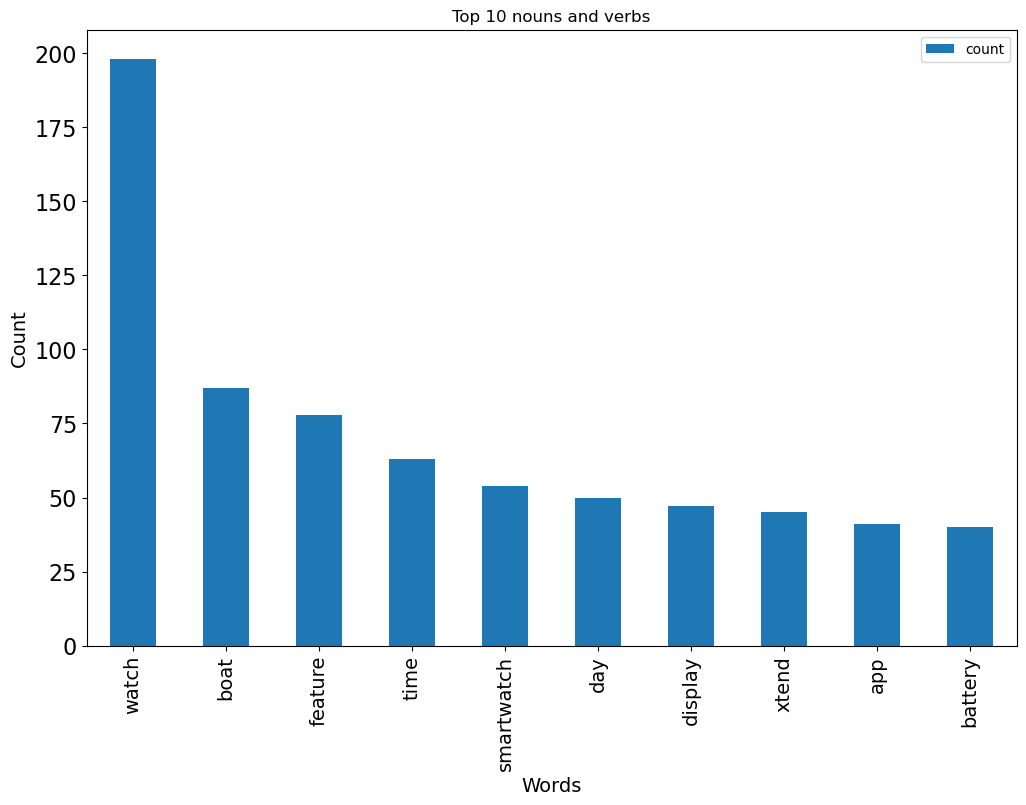

In [71]:
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs', fontsize=16)
plt.xticks(rotation=90,fontsize=14)
plt.xlabel('Words', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

In [72]:
bow_word_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')
# bag-of-words feature matrix
bow_word_feature = bow_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

In [73]:
tfidf_word_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
# TF-IDF feature matrix
tfidf_word_feature = tfidf_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

In [74]:
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

In [75]:
sentiments_using_textblob = dataframe.Clean_Reviews.apply(lambda reviews_text: fetch_sentiment_using_textblob(reviews_text))
pd.DataFrame(sentiments_using_textblob.value_counts())

count
Clean_Reviews       
pos              103
neg                4

In [76]:
def calc_subj(text):
    return TextBlob(text).sentiment.subjectivity
 
# function for Polarity
def calc_pola(text):
    return TextBlob(text).sentiment.polarity
 
dataframe['Subjectivity'] = dataframe.Clean_Reviews.apply(calc_subj)
dataframe['Polarity'] = dataframe.Clean_Reviews.apply(calc_pola)
dataframe.head()

Clean_Reviews  \
0  watch look elegant love wearing watch performa...   
1  smart model boat extend plus watch functioning...   
2  great quality built feature good also waterpro...   
3                     nice watch game nahi hain isme   
4  experience boat xtend call plus smart watch so...   

                                   Uncleaned_Reviews  \
0  watch looks elegant. i love wearing watch. per...   
1  this smart (model boat extend plus) watch func...   
2  it great quality built features good also wate...   
3                    nice watch games nahi hain isme   
4  my experience boat xtend call plus smart watch...   

                                   Tokenized_Reviews  Subjectivity  Polarity  
0  [watch, look, elegant, love, wearing, watch, p...      0.580000  0.540000  
1  [smart, model, boat, extend, plus, watch, func...      0.450855  0.320452  
2  [great, quality, built, feature, good, also, w...      0.450000  0.500000  
3              [nice, watch, game, nahi, hain, isme]      0.700000  0.100000  
4  [experience, boat, xtend, call, plus, smart, w...      0.479338  0.224468

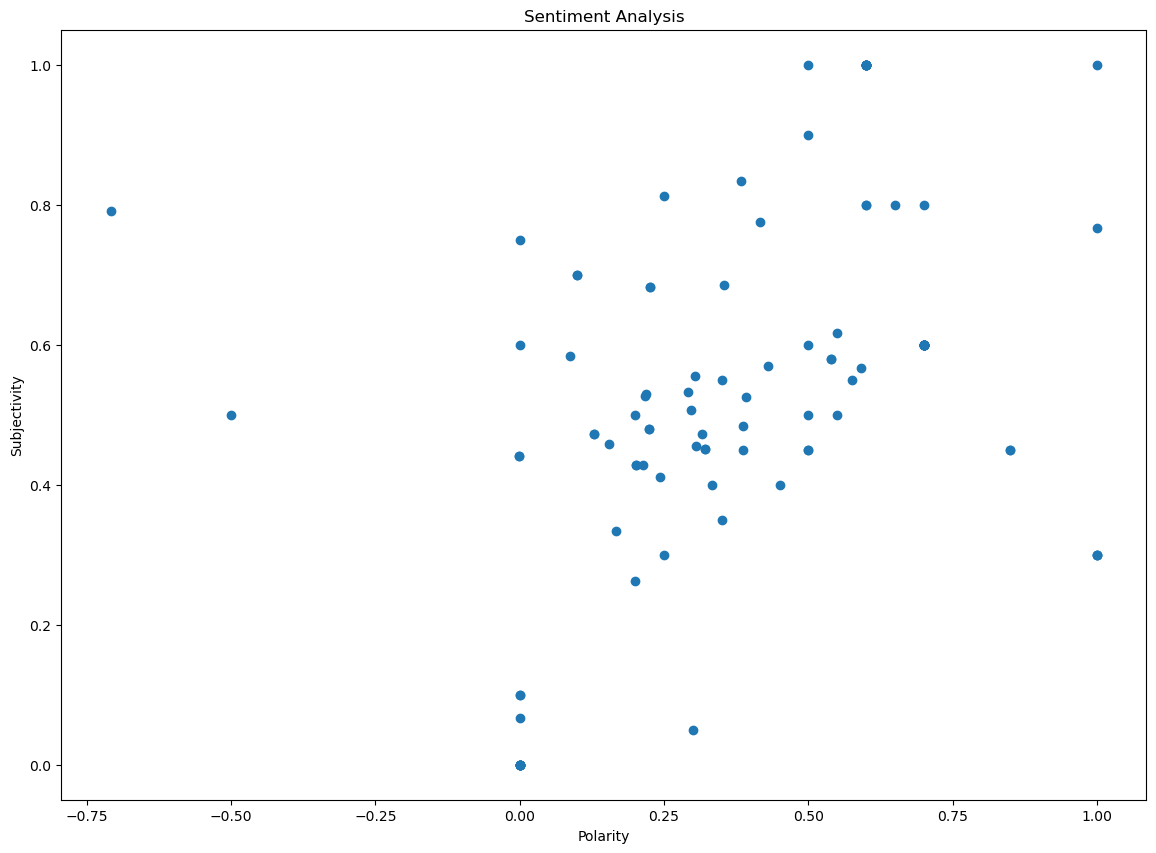

In [77]:
f, axes = plt.subplots(figsize = (14,10))
plt.scatter(dataframe.Polarity, dataframe.Subjectivity)
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity');

In [78]:
dataframe['sentiment'] = sentiments_using_textblob
dataframe.to_csv("clean_review.csv",index=False)
dataframe.head()

Clean_Reviews  \
0  watch look elegant love wearing watch performa...   
1  smart model boat extend plus watch functioning...   
2  great quality built feature good also waterpro...   
3                     nice watch game nahi hain isme   
4  experience boat xtend call plus smart watch so...   

                                   Uncleaned_Reviews  \
0  watch looks elegant. i love wearing watch. per...   
1  this smart (model boat extend plus) watch func...   
2  it great quality built features good also wate...   
3                    nice watch games nahi hain isme   
4  my experience boat xtend call plus smart watch...   

                                   Tokenized_Reviews  Subjectivity  Polarity  \
0  [watch, look, elegant, love, wearing, watch, p...      0.580000  0.540000   
1  [smart, model, boat, extend, plus, watch, func...      0.450855  0.320452   
2  [great, quality, built, feature, good, also, w...      0.450000  0.500000   
3              [nice, watch, game, nahi, hain, isme]      0.700000  0.100000   
4  [experience, boat, xtend, call, plus, smart, w...      0.479338  0.224468   

  sentiment  
0       pos  
1       pos  
2       pos  
3       pos  
4       pos

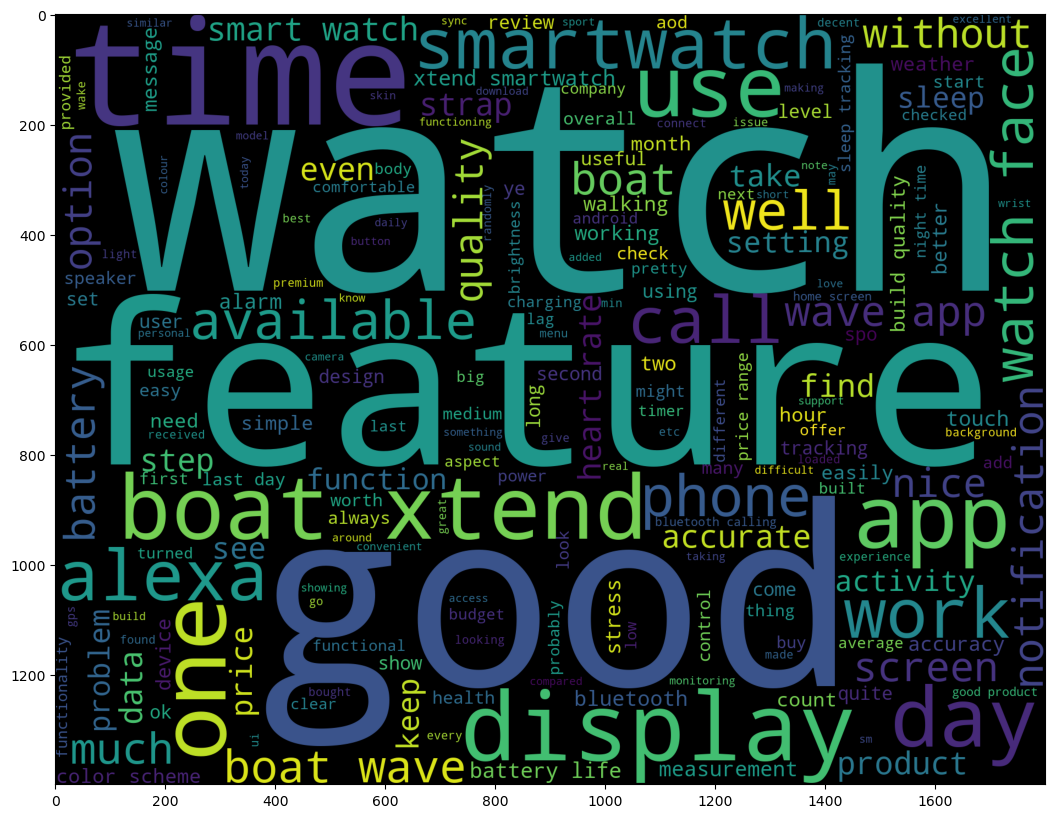

In [79]:
allWords_ = ' '.join([review for review in dataframe[:500]['Clean_Reviews']])
f, axes = plt.subplots(figsize=(14,10))
wordcloud= WordCloud(background_color = 'black', width = 1800, height =1400).generate(allWords_)
plt.imshow(wordcloud);

In [80]:
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14,10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

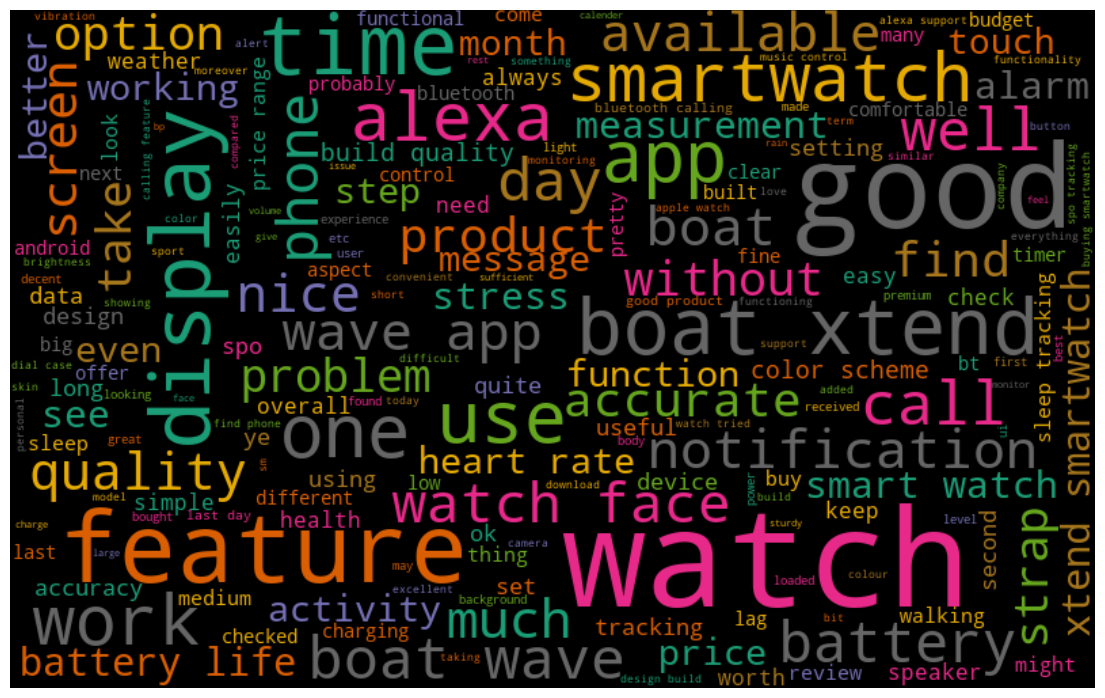

In [81]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'pos']])
generate_wordcloud(all_words)

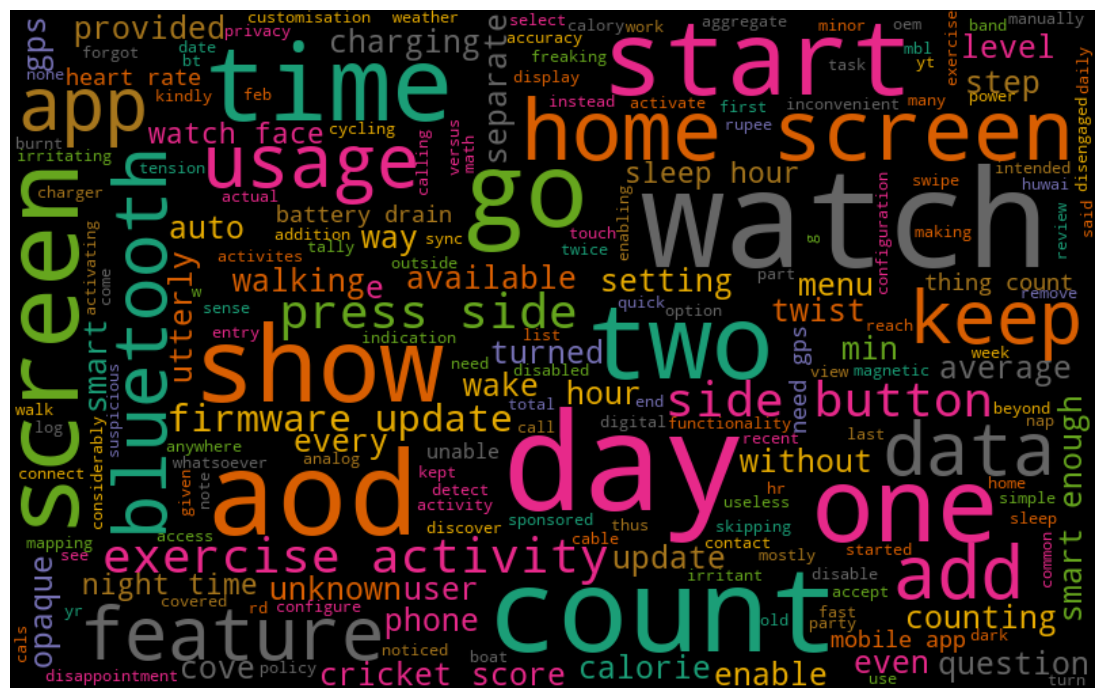

In [82]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'neg']])
generate_wordcloud(all_words)